# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Multiple outputs from cell
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" 

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [3]:
# Your code to explore data and train a regression model
data.shape
data.describe()
data.isnull().any().sum()
data.info()


(414, 7)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


<Figure size 1440x1080 with 0 Axes>

<AxesSubplot:>

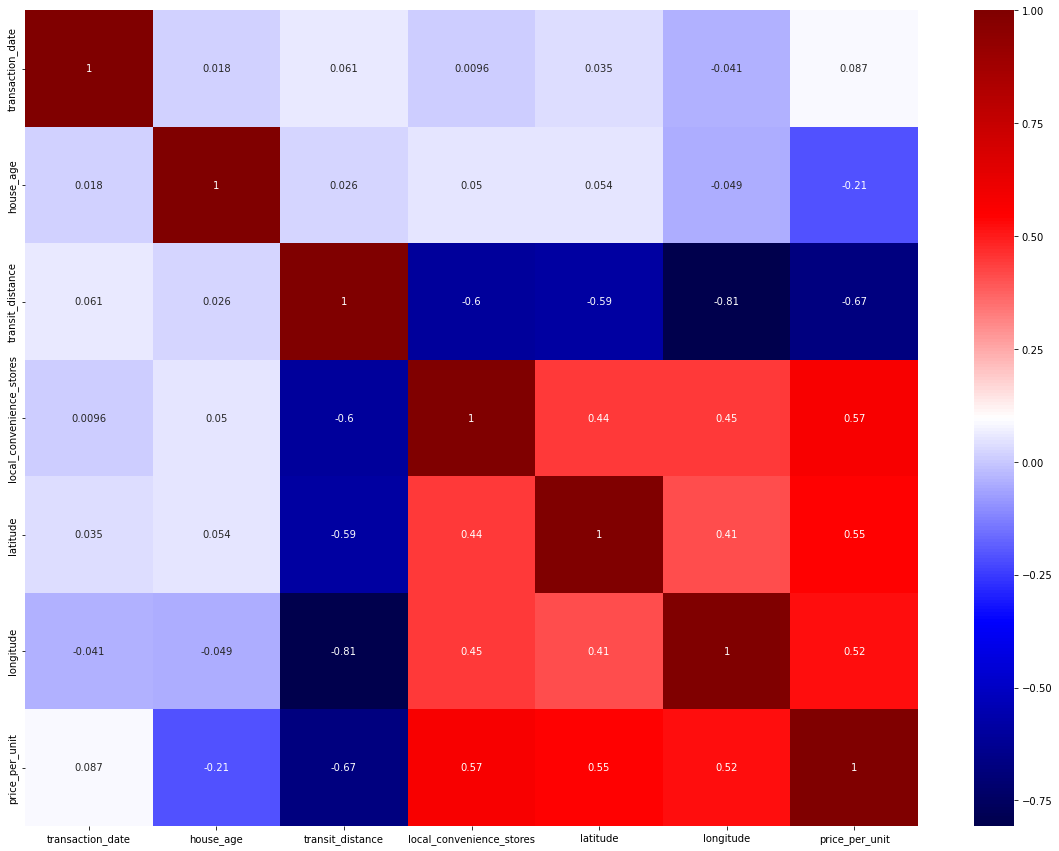

In [4]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, cmap='seismic')

In [11]:
X,y = data[['transaction_date', 'house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']].values, data[['price_per_unit']].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.9, random_state=1)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


In [15]:
y_hat = model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
print(rmse)

6.295152449777827


# Trying other algorithms

 Lasso 

In [17]:
from sklearn.linear_model import Lasso

model = Lasso().fit(X_train, y_train)
print(model)

y_hat = model.predict(X_test)

mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
print(rmse)


Lasso()
6.214141405295876


Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

model = DecisionTreeRegressor().fit(X_train, y_train)
print(model)

y_hat = model.predict(X_test)

mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
print(rmse)


DecisionTreeRegressor()
7.425166344136354


Ensemble models - RandomForest & GradientBoosting

In [20]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(X_train, y_train.values.ravel())
print(model)
y_hat = model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
print(rmse)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor().fit(X_train, y_train)
print(model)

y_hat = model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
print(rmse)

GradientBoostingRegressor()
5.177512043204202


/home/crimsonhaze/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Optimize HyperParameters

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

alg = RandomForestRegressor()

params = {
    #'learning_rate':[0.01, 0.05, 0.1, 1.0],
    'n_estimators': [50, 100, 150, 500],
    'max_depth': [1,3,5,7]
}

score = make_scorer(mean_squared_error, greater_is_better=False)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train,y_train)
print(f'Best Parameters: {gridsearch.best_params_}')

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

y_hat = model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
print(f'rmse: {rmse}')

/home/crimsonhaze/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/crimsonhaze/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/crimsonhaze/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/crimsonhaze/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/home/crimsonhaze/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/crimsonhaze/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/crimsonhaze/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/crimsonhaze/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7],
                         'n_estimators': [50, 100, 150, 500]},
             return_train_score=True,
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

Best Parameters: {'max_depth': 7, 'n_estimators': 150}
RandomForestRegressor(max_depth=7, n_estimators=150) 

rmse: 5.325780225137533


# Train model with optimised hyperparameters

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

preprocessor_step = Pipeline(steps=[('scaler', StandardScaler())])
pipeline = Pipeline(steps=[('preprocess', preprocessor_step), 
                          ('regressor', RandomForestRegressor(n_estimators=100, max_depth=7))])

model = pipeline.fit(X_train, y_train)
print(model)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor', RandomForestRegressor(max_depth=7))])


/home/crimsonhaze/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [15]:
y_hat = model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
print(f'rmse: {rmse}')

rmse: 5.86998145587887


## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [16]:
# Your code to use the trained model
# Save the model as a pickle file
import joblib
filename = '../models/real_estate_regression_challenge.pkl'
joblib.dump(model, filename)

['../models/real_estate_regression_challenge.pkl']

# Inferencing

In [17]:
col_names = ['transaction_date', 'house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']
df_inf = pd.DataFrame(np.array([[2013.167, 16.2, 289.3248, 5, 24.98203, 121.54348], [2013.000,13.6,4082.015,0,24.94155,121.50381]]), columns=col_names)
df_inf

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude
0,2013.167,16.2,289.3248,5.0,24.98203,121.54348
1,2013.000,13.6,4082.0150,0.0,24.94155,121.50381


In [18]:
loaded_model = joblib.load(filename)
y_inf = loaded_model.predict(df_inf)
print(f'predicted price per unit: {y_inf}')

predicted price per unit: [50.0620231  16.32086484]
